### Import Dataset

In [101]:
import pandas as pd
import numpy as np

In [102]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Pre Process Data

In [103]:
from tensorflow.keras.utils import to_categorical

train = train_images / 255
test = test_images / 255
train_label = to_categorical(train_labels)
test_label = to_categorical(test_labels)

train = train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

print(train.shape, train_label.shape, train_label[0])

(60000, 28, 28, 1) (60000, 10) [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Define Model

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [105]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

In [106]:
import tensorflow as tf
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [107]:
callback  = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = cnn_model.fit(train, train_label, batch_size=128, epochs=20, validation_data=(test, test_label), callbacks=[callback])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7705 - loss: 0.6867 - val_accuracy: 0.6763 - val_loss: 0.9000
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8852 - loss: 0.3127 - val_accuracy: 0.9033 - val_loss: 0.2608
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9024 - loss: 0.2615 - val_accuracy: 0.9055 - val_loss: 0.2604
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9140 - loss: 0.2331 - val_accuracy: 0.9103 - val_loss: 0.2518
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9230 - loss: 0.2092 - val_accuracy: 0.9149 - val_loss: 0.2380
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9295 - loss: 0.1907 - val_accuracy: 0.9211 - val_loss: 0.2193
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9311 - loss: 0.1835 - val_accuracy: 0.9239 - val_loss: 0.2197
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9351 - loss: 0.1713 - val

In [108]:
cnn_model.evaluate(test, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2287


[0.21529650688171387, 0.9341999888420105]

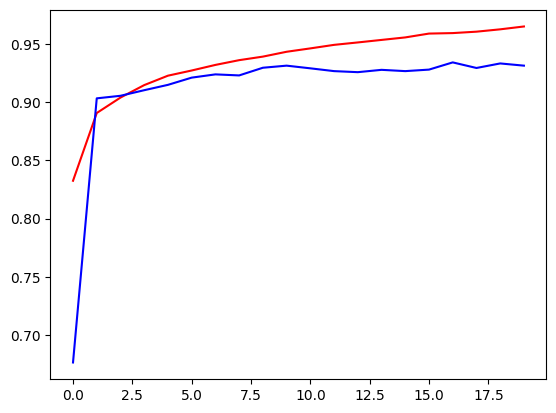

In [109]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red")
plt.plot(history.history["val_accuracy"],  color="blue")
plt.show()